# Import the necessary Packages

In [1]:
from datasets import load_dataset, load_from_disk
from transformers import AutoTokenizer

# for training
from transformers import DataCollatorForLanguageModeling
from transformers import GPT2Config, GPT2LMHeadModel
from transformers import TrainingArguments, Trainer

# for experiment tracking
import wandb

# common packages
import pandas as pd
from pprint import pprint
import json
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
ds_full = load_dataset('bookcorpus', split='all')
pprint(ds_full)

Found cached dataset bookcorpus (/home/sachin/.cache/huggingface/datasets/bookcorpus/plain_text/1.0.0/eddee3cae1cc263a431aa98207d4d27fd8a73b0a9742f692af0e6c65afa4d75f)


Dataset({
    features: ['text'],
    num_rows: 74004228
})


> The dataset contains 74 million sentences.

> The dataset contains about 1 billion words.

In [3]:
ds_full

Dataset({
    features: ['text'],
    num_rows: 74004228
})

In [4]:
# Calculate the exact number of words in the dataset
total_words = sum(len(text.split()) for text in ds_full['text'])
print(f"Total number of words: {total_words}")

Total number of words: 984845743


## Find the sample which contains a single word

In [5]:
total_samples_with_one_word = sum(1 for text in ds_full['text'] if len(text.split()) == 1)
print(f"Total samples with exactly one word: {total_samples_with_one_word}")

Total samples with exactly one word: 71598


## Find the samples which contain more than 1024 words

In [6]:
total_samples_with_more_than_1024_words = sum(1 for text in ds_full['text'] if len(text.split())>1024)
print(f"Total samples with more than 1024 words: {total_samples_with_more_than_1024_words}")

Total samples with more than 1024 words: 50


## Print the distribution of the length of the samples in the dataset

In [7]:
# Calculate the length of each sample (number of words per sample)
sample_lengths = [len(text.split()) for text in ds_full['text']]
sample_lengths.sort()

In [ ]:
bins = np.unique(sample_lengths)

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

In [13]:
len(bins)

547

In [14]:
len(bins[0:150])

150

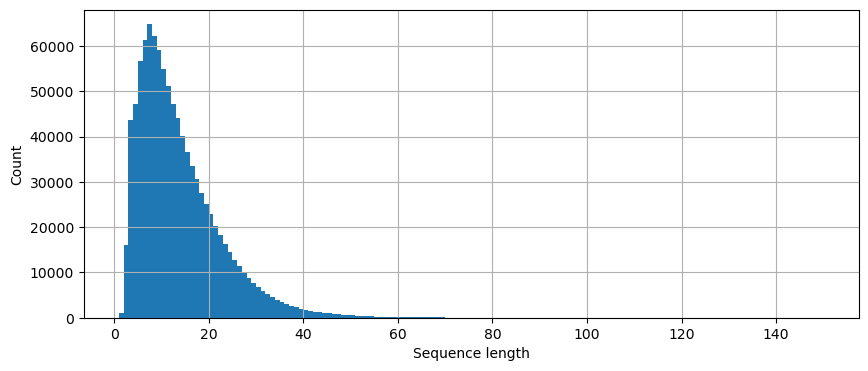

In [21]:
# Plot the distribution
plt.figure(figsize=(10, 4))
plt.hist(random.sample(sample_lengths, k=10**6), bins=bins[0:150])
plt.xlabel('Sequence length')
plt.ylabel('Count')
plt.grid()
plt.show()

In [23]:
hopper_tokenizer = AutoTokenizer.from_pretrained('../week-2/hopper')
print(hopper_tokenizer)

HFValidationError: Repo id must be in the form 'repo_name' or 'namespace/repo_name': '../week-2/hopper'. Use `repo_type` argument if needed.